# Начало проекта


##  импорт библиотек и открытие данных ##

In [47]:
import plotly.express as px
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

try:
    df = pd.read_csv('/datasets/games.csv.')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [48]:
data = df.copy()
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [49]:
ny = pd.DataFrame(data[data['Year_of_Release'].notnull()].groupby('Name')['Year_of_Release'].first().reset_index())
for a in df['Name'].unique():
    rows = (df['Name']== a) & (df['Year_of_Release'].isna())
    refill_years = ny.loc[ny['Name']==a, 'Year_of_Release']
    if refill_years.shape[0]>0:
        df.loc[rows ,'Year_of_Release'] = df.loc[rows ,'Year_of_Release'].fillna(float(refill_years))

In [50]:
data.shape

(16715, 11)

In [51]:
data.columns = data.columns.str.lower()

##  замена типов данных, замена значений ##

In [52]:
data.critic_score = data.critic_score.replace('tbd', -1)
data.critic_score = data.critic_score.fillna(0)
data.critic_score = data.critic_score.astype('float64')

data.user_score = data.user_score.replace('tbd', -1)
data.user_score = data.user_score.fillna(0)
data.user_score = data.user_score.astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [53]:
data.year_of_release = data.year_of_release.fillna('0')
data = data.drop(np.where(data['year_of_release'] == 0)[-1])
data.year_of_release = data.year_of_release.astype('int')
data.year_of_release = data.year_of_release.fillna('0')
data = data.drop(np.where(data['year_of_release'] == 0)[-1])
data.rating = data.rating.replace('K-A', 'E')

In [54]:
data.isna().sum().sort_values(ascending=False)

rating             6678
name                  2
genre                 2
platform              0
year_of_release       0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
dtype: int64

In [55]:
data[data.name.isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,0.0,0.0,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,0.0,0.0,NaN


---пропуски есть в колонках с возрастным рейтингом игр и рейтингом критиков и пользователей. Сперва может показаться, что рейтинг отсутсвует у старых игр, но при случайных выборках оказывается, что рейтинг осутствует у плохопродаваемых игр. Возможно, это локальные игры, или низкобюджетные. Кроме того ESRB североамериканская компания и не обязана заниматься всеми играми в мире
---пропуски оставлю для дальнейшей работы. Возможно их придется заменить на заглушки, покажет время.

---в колонке с оценкой пользователей есть значение 'tbd', что означает - подлежит определению. Такое значение также присуще плохопокупаемым играм, или играм вне оценки ESRB. Для дальнейшей работы считаю корректным заменить 'tbd' на значение Nan

##  вывод новой колонки total_sales ##

In [56]:
data['total_sales'] =  data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
5362,Monster Rancher 4,PS2,2003,Simulation,0.08,0.06,0.19,0.02,77.0,9.1,E,0.35
2073,Dynasty Warriors 3: Xtreme Legends,PS2,2002,Action,0.13,0.10,0.74,0.03,72.0,9.3,T,1.00
14537,Rayman 3: Hoodlum Havoc,PC,2003,Platform,0.00,0.03,0.00,0.00,74.0,8.3,E,0.03
14851,Rugby Challenge 3,PS3,2016,Sports,0.00,0.02,0.00,0.00,0.0,-1.0,NaN,0.02
6498,Gundam Battle Universe,PSP,2008,Fighting,0.00,0.00,0.26,0.00,0.0,0.0,NaN,0.26
3976,Sega Bass Fishing,Wii,2008,Sports,0.45,0.01,0.00,0.04,59.0,6.3,E,0.50
7052,Freedom Fighters,XB,2003,Shooter,0.17,0.05,0.00,0.01,82.0,8.2,T,0.23
9144,Pro Evolution Soccer 2015,X360,2014,Sports,0.05,0.08,0.00,0.01,0.0,6.8,E,0.14
10759,Shining Force EXA,PS2,2007,Role-Playing,0.00,0.00,0.10,0.00,64.0,7.3,E10+,0.10
9739,Mobile Suit Gundam Seed: Rengou vs. Z.A.F.T. P...,PSP,2007,Shooter,0.00,0.00,0.12,0.00,0.0,0.0,NaN,0.12


## вывод новой колонки platforms_by_category ##

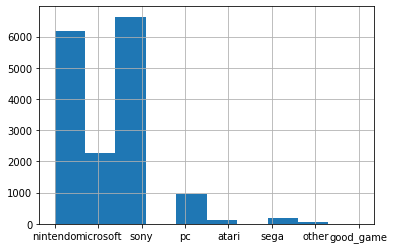

In [57]:
platforms_by_category = {
    'sony': ['PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV'],
    'nintendo': ['Wii', 'WiiU', 'NES', 'GB', 'DS', 'SNES', 'GBA', '3DS', 'N64', 'GC', 'NG'],
    'microsoft': ['X360', 'XOne', 'XB'],
    'good_game': ['GG'],
    'sega':['GEN', 'SAT'],
    'pc': ['PC'],
    'atari': ['2600'],
    'other': ['SCD', 'DC', 'WS', 'TG16','3DO', 'PCFX']
}
platform_to_category = {platform: category
                        for category, platforms in platforms_by_category.items()
                        for platform in platforms}
data['platform_category'] = data.platform.map(platform_to_category)
data['platform_category'].hist();

## вывод новой колонки portable_and_station
возможно, что анализ портативных устройств для нас тоже будет интересен

<AxesSubplot:>

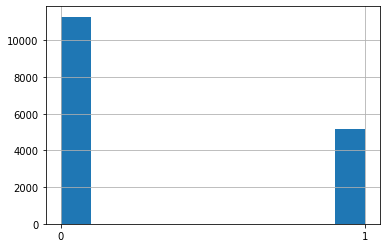

In [58]:
portable_and_station = {
    '1': [ 'PSP', 'PSV', 'GB', 'GBA', 'DS', '3DS'],
    '0': [
        'SCD', 'DC', 'WS', 'TG16','3DO', 'PCFX','2600','PC','GEN', 
        'SAT','GG','PS', 'PS2', 'PS3', 'PS4','Wii', 'X360', 'XOne', 
        'XB', 'WiiU', 'NES', 'SNES', 'N64', 'GC', 'NG','X360', 'XOne', 'XB'
    ]
}
#0 это портативные устройства
#1 это стационарные устройства
portable_and_station = {por_and_stat: category
                        for category, platforms in portable_and_station.items()
                        for por_and_stat in platforms}
data['portable_and_station'] = data.platform.map(portable_and_station)
data['portable_and_station'].hist()

# 2. Исследовательских анализ данных #

---здесь нам предстоит посмотреть данные по играм по 
    
    
    
    годам
    платформам
    периодам
    отзывам
    жанрам


предстоит использовать графики и таблицы

##  Проверка по годам

In [59]:
data.value_counts('year_of_release').to_frame().head(10)

,0
year_of_release,
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775


---пик продаж пришелся на 2007-2011 года

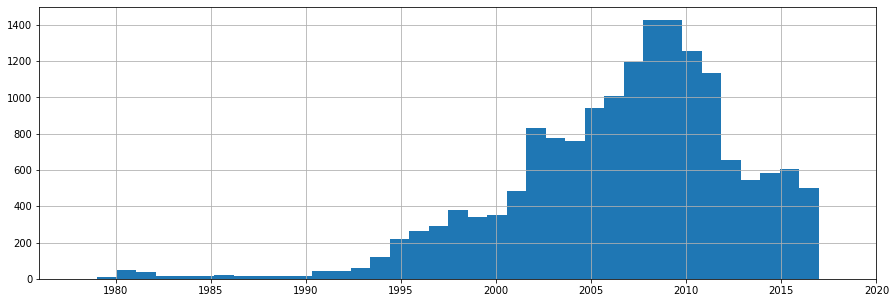

In [60]:
data.year_of_release.hist(bins = 39, figsize = (15,5), range=(1978, 2018));

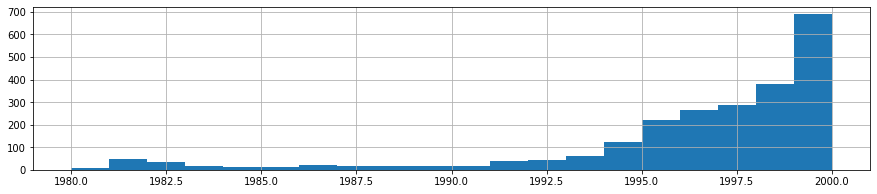

In [61]:
data.year_of_release.hist(bins = 20, figsize = (15,3), range=(1980, 2000));

--- с 80х годов по 91 выпуск игр был стабильным и низким. Начало роста количества игр связано с развитием ПК и ЭВМ.

--- нулевые значения считаю нужным оставить, т.к.в них могут находится статистически важные данные о жанрах

---снижение после 2009 может быть связано с развитием мобильных устройств или игр, с развитием персональных компютеров или по другим причинам

--- наибольшие суммарные продажи показывают таки платформы, как PS2, X360, PS3, Wii, DS, PS

## Проверка по платформам ##

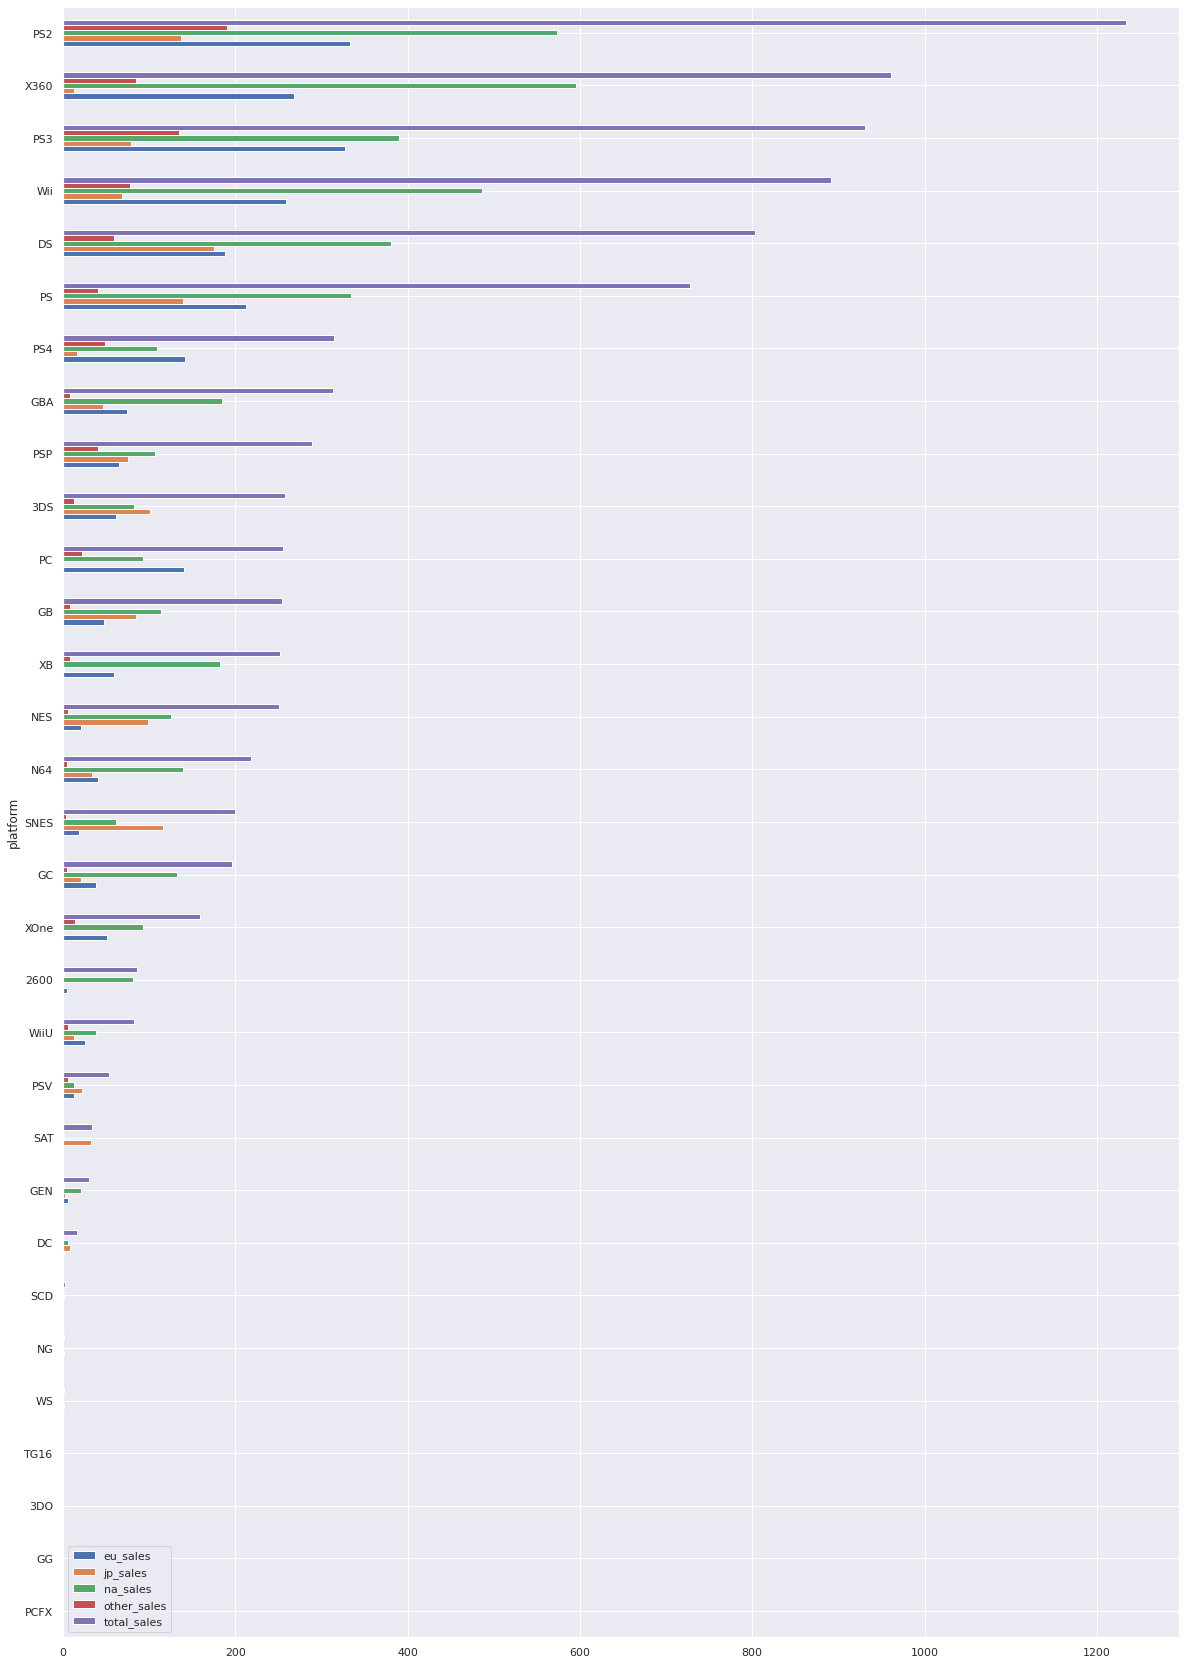

In [98]:
data_pivot=data.pivot_table(index='platform',values=['na_sales','eu_sales','jp_sales','other_sales', 'total_sales'],aggfunc=('sum'))
data_pivot.sort_values(by='total_sales',ascending=True).plot(kind='barh',figsize=(20,30));

<AxesSubplot:ylabel='platform'>

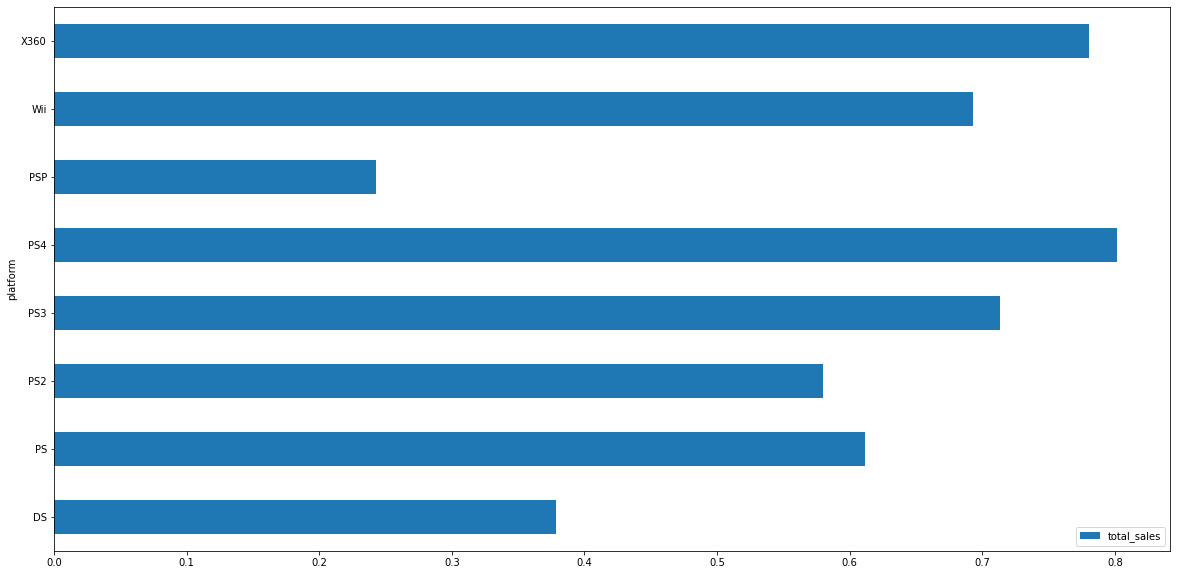

In [63]:
p_filter = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'PSP']
platform_best = data[data.platform.isin(p_filter)]

platform_best.pivot_table(index='platform',values='total_sales').plot(kind='barh',figsize=(20,10));

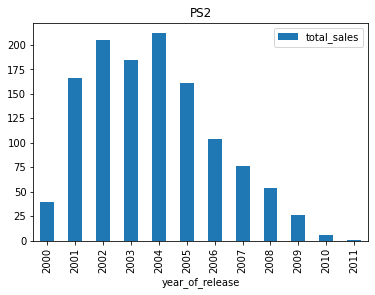

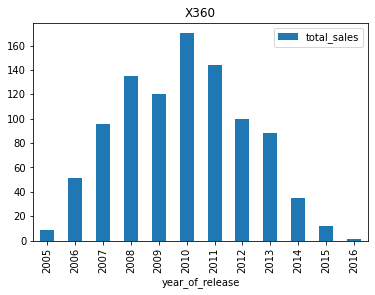

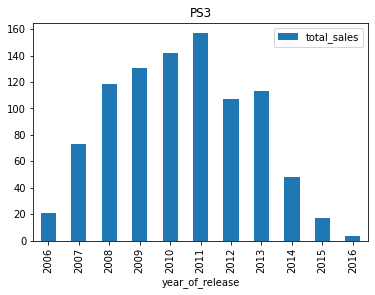

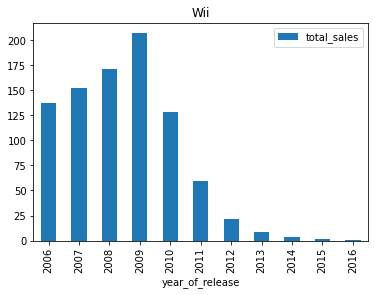

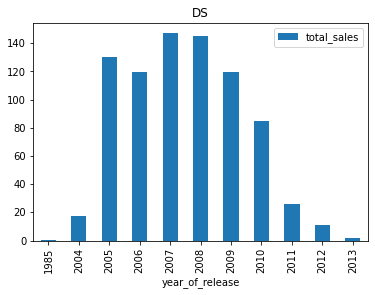

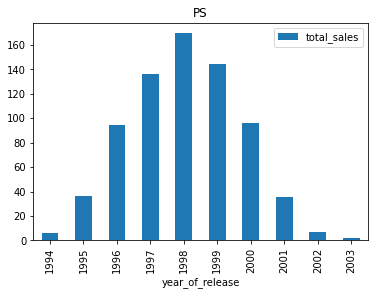

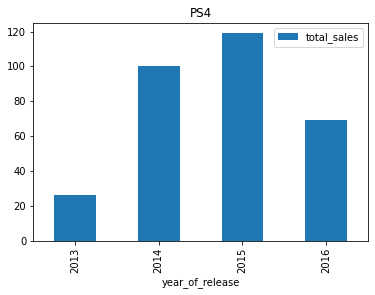

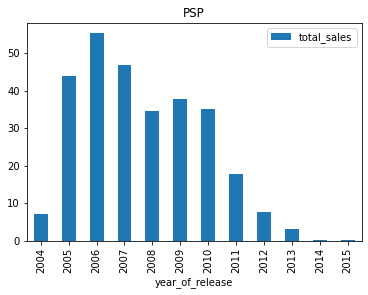

In [64]:
platform_total_sales = platform_best.pivot_table(index='platform', values='total_sales', aggfunc='sum').reset_index()
platform_total_sales = platform_total_sales.sort_values(by='total_sales', ascending=False)
platform_unique = platform_total_sales[platform_total_sales['total_sales'] > 259]['platform'].unique()
for i in platform_unique:
    platform = data[data['platform'] == i].pivot_table(index = 'year_of_release', values = 'total_sales',aggfunc = 'sum').reset_index()
    platform.plot(kind='bar', x = 'year_of_release', y = 'total_sales', xlim = (1980, 2016), title=i)
    plt.xticks(rotation=90)
    plt.show() 


In [100]:
group_data = data.groupby(['platform_category'])['total_sales'].sum()
fig = px.bar(group_data, x="total_sales", title="Long-Form Input")
fig.show()

In [101]:
group_data = platform_best.groupby(['platform_category'])['total_sales'].sum()
fig = px.bar(group_data, x="total_sales")
fig.show()

Несмотря на то, что sony и nintendo в абсолютных продажах не уступают друг другу, в выборке по лучшим приставкам sony превосходит nintendo почти в полтора раза. Этот график показывает, что PS чаще меняет поколения и они более актуальны

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

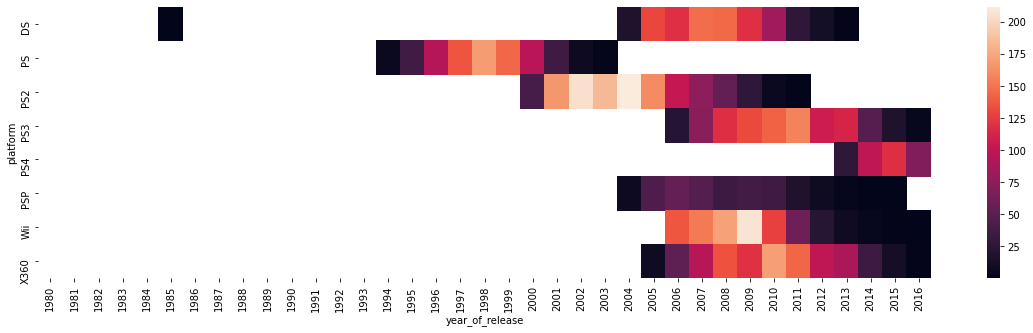

In [67]:
data_pivot_plat_year=data.pivot_table(index="platform",columns='year_of_release',values='total_sales',aggfunc=('sum'))
top_heat=data_pivot_plat_year.query('platform in @p_filter')
plt.figure(figsize=(20,5))
sns.heatmap(top_heat, fmt='d');

Ps2 вышла в 2000, 4 года держалась на высоком уровне, потом пошел спад до10 года
Х360 вышла в 2005 , с пиком в 2010 и совсем ушла с рынка в 2016
ps3 появилась в 2006, спрос рос до 2011 и изчез в 2016
Wii вышла в 2006 и совсем угасала с 2013
ds вшла в 2004, был стабильный высокий спрос до 2010
ps вышла в 1994 и продавалась до 2002
GBA продавался с 2001 по 2007
PS4 вышла в 2013, но наши данные обрываются в 2016, и неизвестно, есть ли дальнейший рост
PSP вышла в 2004 и изчезла с графика в 2014
В среднем платформы живут на рынке 9-10 лет, перекрывая жизнь поколений своих производителей и не отставая от конкурентов. Не успешные платформы сразу показывают короткий период жизни
Для смены поколения необходимо минимум 2 года, но это уже когда спрос на платформу начинает падать

В этом графике видно, насколько сильно и долго лидировали те или иные платформы. 
Интересно, что пик популярности смещен к началу презентации и далее идет медленное угасание продаж. Возможно, это повлияет на будщие прогнозы по продажам

### Определение перспективных платформ по продажам ###

В среднем жизнь платформы составляет до 10 лет, с стремительным набором популярности до середины актуальности и дальнейшим уменьшением популярности.

Если платформа только вышла, то у продавцов игр есть 4-5 лет для активной продажи и 4-5 лет для ниспадающих продаж.

Если нам нужно составить прогноз к 2017, то считаю коректным выбрать актуальный период в 5 лет, с 2012 года и далее. Так мы можем увидеть и актуальные тенденции и угасающие



### ящик сусами. Глобальные продажи игр в разбивке по платформам. Результат ###

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

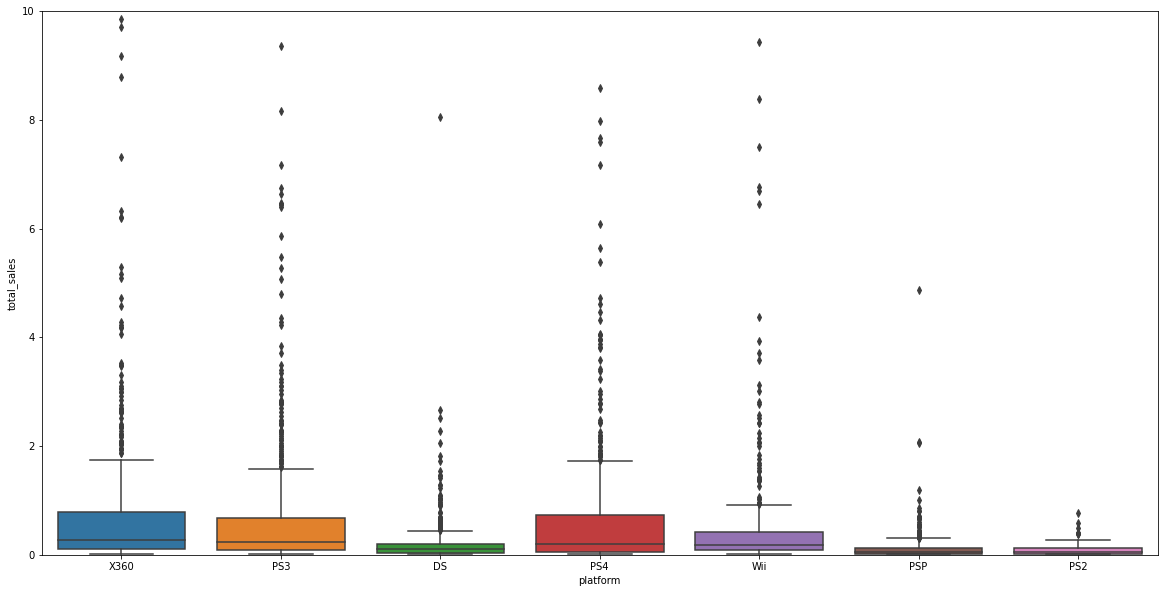

In [68]:
actual_data=data.query('platform in @p_filter and year_of_release>=2010')
plt.figure(figsize=(20,10))
plt.ylim(0,10)
sns.boxplot(x='platform',y='total_sales',data=actual_data)

Большинство успешных игр были на платформах Х360 и PS4. Но у них медианы довольно сильно скошенны влево. PS2 хоть и выделяется на тепловом графике, по общему числу может сравниться с PSP

### Корреляция продаж и отзывов. Диаграмма рассеяния, корр. между отз. и продажами.Выводы ###

<AxesSubplot:title={'center':'зависимость продаж платформы  PS3 от отзывов критиков'}, xlabel='critic_score', ylabel='total_sales'>

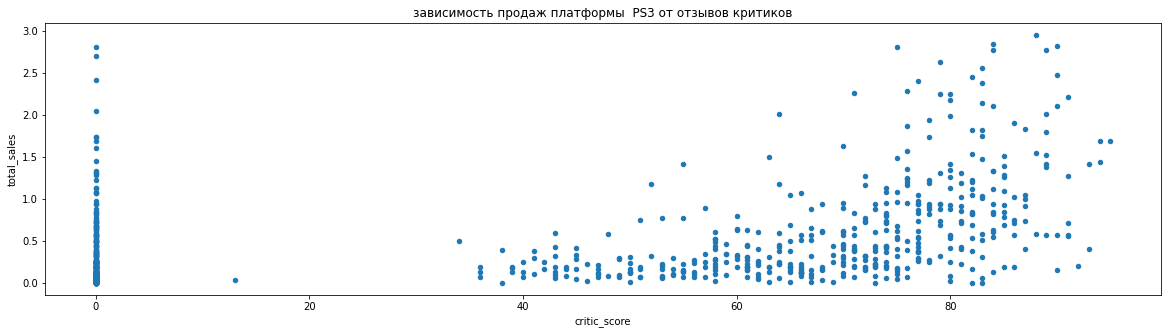

In [69]:
actual_data.query('platform=="PS3" and total_sales<=3').sort_values(by='critic_score',ascending=True).plot(kind='scatter',x='critic_score',y='total_sales',figsize=(20, 5),title='зависимость продаж платформы  PS3 от отзывов критиков')


Большинство продаж с рейтингом больше 50, посмотрим на другие платформы

<AxesSubplot:title={'center':'зависимость продаж платформы  PS4 от отзывов критиков'}, xlabel='critic_score', ylabel='total_sales'>

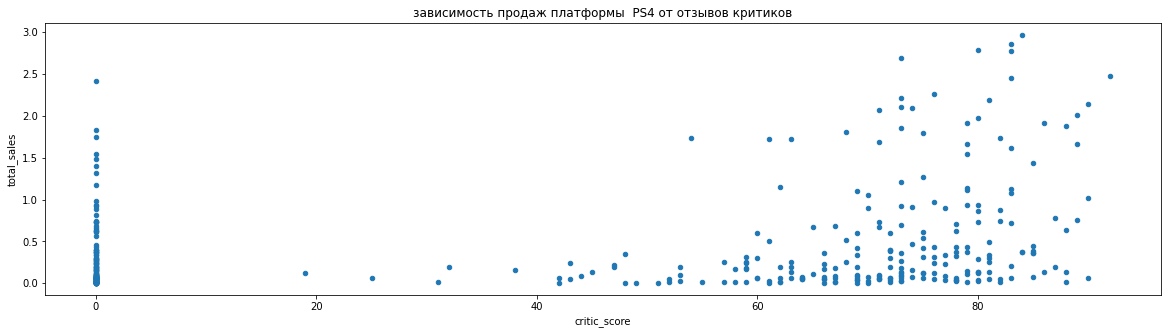

In [70]:
actual_data.query('platform=="PS4" and total_sales<=3').sort_values(by='critic_score',ascending=True).plot(kind='scatter',x='critic_score',y='total_sales',figsize=(20, 5),title='зависимость продаж платформы  PS4 от отзывов критиков')


на PS4 небольшое количество продаж, да и данные у нас неполные для обширного анализа, но и здесь видно, что чем больше оценка, тем больше продаж

<AxesSubplot:title={'center':'зависимость продаж платформы  X360 от отзывов критиков'}, xlabel='critic_score', ylabel='total_sales'>

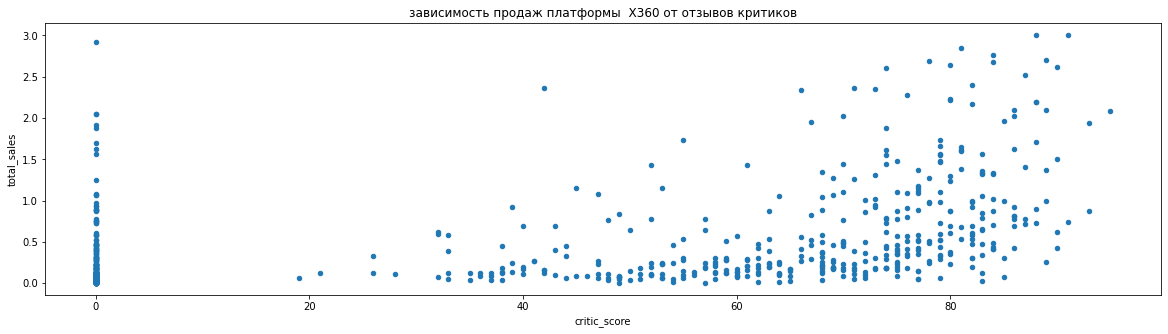

In [71]:
actual_data.query('platform=="X360" and total_sales<=3').sort_values(by='critic_score',ascending=True).plot(kind='scatter',x='critic_score',y='total_sales',figsize=(20, 5),title='зависимость продаж платформы  X360 от отзывов критиков')


для X360 зависимость более плавная и более частые покупки связаны с высоким рейтингом, но игроки готовы покупать и менее пополярные игры

<AxesSubplot:title={'center':'зависимость продаж платформы  PS3 от отзывов игроков'}, xlabel='user_score', ylabel='total_sales'>

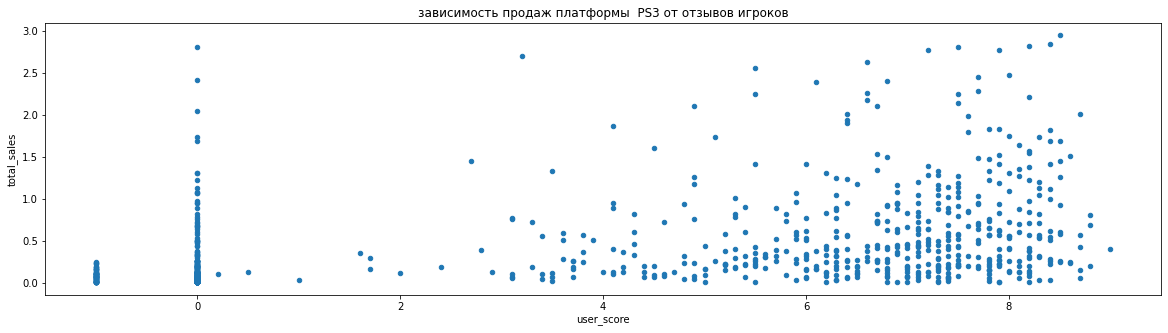

In [72]:
actual_data.query('platform=="PS3" and total_sales<=3').sort_values(by='user_score',ascending=True).plot(kind='scatter',x='user_score',y='total_sales',figsize=(20,5),title='зависимость продаж платформы  PS3 от отзывов игроков')


Для PS3 картина в общем и целом сохраняется - чем выше оценка, тем больше продаж

In [73]:
ps3_actual=actual_data.query('platform=="PS3"')
ps3_actual['total_sales'].corr(ps3_actual['user_score'])

0.25247636215531116

In [74]:
X360_actual=actual_data.query('platform=="X360"')
ps3_actual['total_sales'].corr(ps3_actual['user_score'])

0.25247636215531116

Зависимость продаж от оценки игроков не сильная

In [75]:
ps3_actual['total_sales'].corr(ps3_actual['critic_score'])

0.3367978624916017

In [76]:

X360_actual['total_sales'].corr(X360_actual['critic_score'])

0.3042887201750376

зависимость продаж от оценки критиков положительная


In [77]:
sony_actual=actual_data.query('platform_category=="sony"')
sony_actual['total_sales'].corr(sony_actual['critic_score'])

0.3476235723677851

In [78]:
nintendo_actual=actual_data.query('platform_category=="nintendo" and total_sales<=3')
nintendo_actual['total_sales'].corr(nintendo_actual['critic_score'])

0.369662662063952

зависимость продаж по производителям и оценкам критиков различается и у sony сильнее, чем у nintendo
можно предположить, что более успешные платформы получают оценки выше и чем выше оценки, тем и больше продажи

### Продажи на других платформах ###

### Распределение игр по жанрам. Самые прибыльные жанры? выделяются ли жанры с низ.и выс.продажами ###

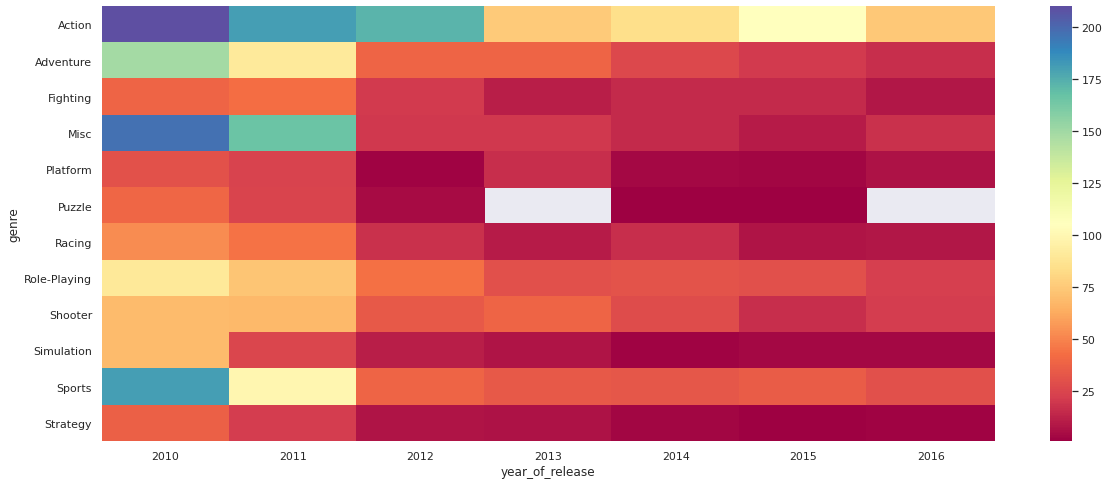

In [79]:
heat_genre_year = actual_data.pivot_table(index='genre',
                                          columns='year_of_release',
                                          values='name',
                                          aggfunc='count')
sns.set(rc = {'figure.figsize':(20,8)})
sns.heatmap(heat_genre_year, fmt='d', cmap="Spectral");

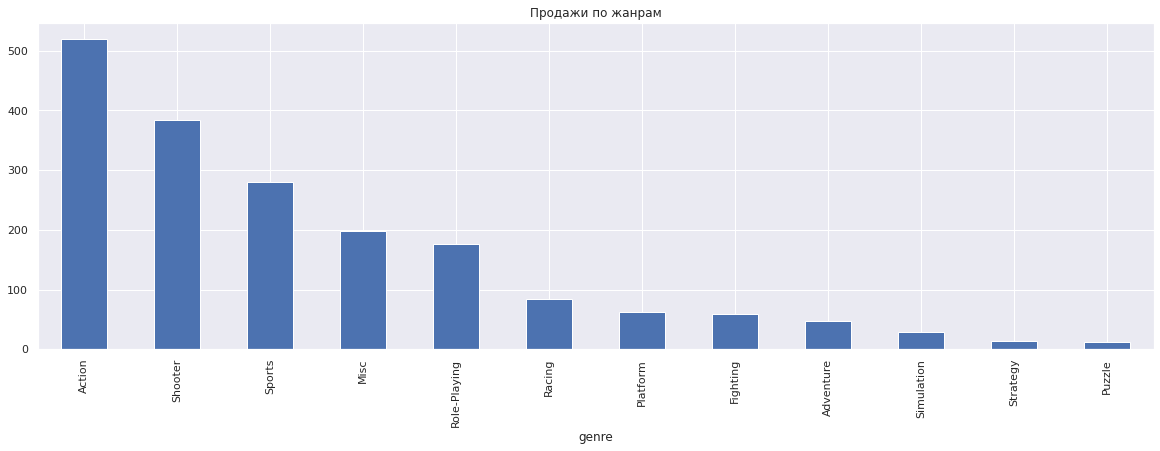

In [80]:
genre_sales=actual_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genre_sales.plot(y='genre',grid=True,figsize=(20,6),kind='bar',title='Продажи по жанрам');


самый многочисленные по продажам это экшены, спортивные игры и шутеры

не популярные по продажам приключения, пазлы и стратегии

несмотря на то, что пик экшенов пришелся на начало исследуемого периода, интерес к нему не утих и в конце актуального периода

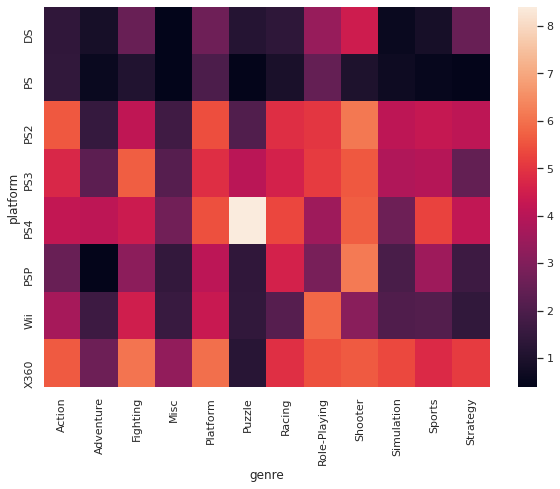

In [81]:
heatmap_user=platform_best.pivot_table(index='platform',columns='genre',values='user_score')
plt.figure(figsize=(10,7))
sns.heatmap(heatmap_user);

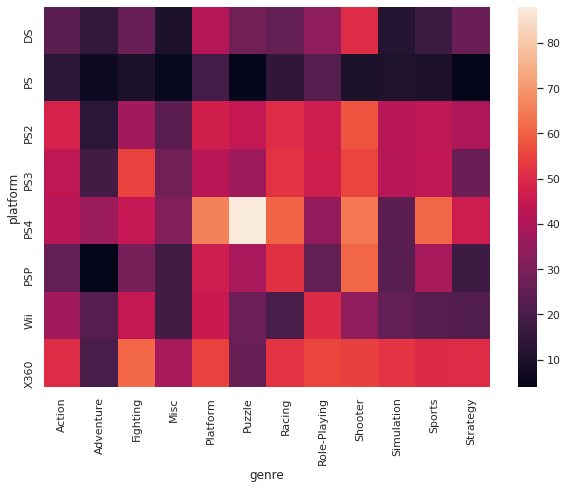

In [82]:
heatmap_critic=platform_best.pivot_table(index='platform',columns='genre',values='critic_score') 
plt.figure(figsize=(10,7))
sns.heatmap(heatmap_critic);

самая высокооцениваемый жанр это puzzle на ps4, возможно это популярная у подростков minecraft, и не удивительно, что любимая игра активной части аудитории получает больше всего оценок


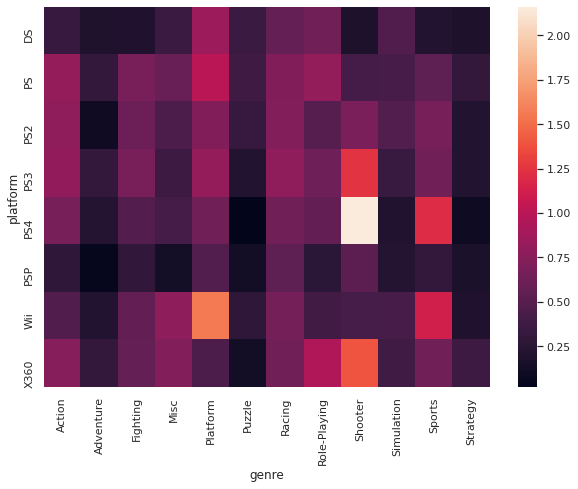

In [83]:
heatmap_critic=platform_best.pivot_table(index='platform',columns='genre',values='total_sales') 
plt.figure(figsize=(10,7))
sns.heatmap(heatmap_critic);

по продажам лидируют шутеры и спортивные игры на PS4
шутеры на PS3 и Х360
также популярны платформенные игры и спортивные на Wii
выделение жанров по продажам достаточное, чтобы обратить на это внимание

# Составление портрета пользователя каждого региона # 

## Определение пользователя кажого региона (3шт)

## Топ-5 популярных платформ. Пояснить разницу ##

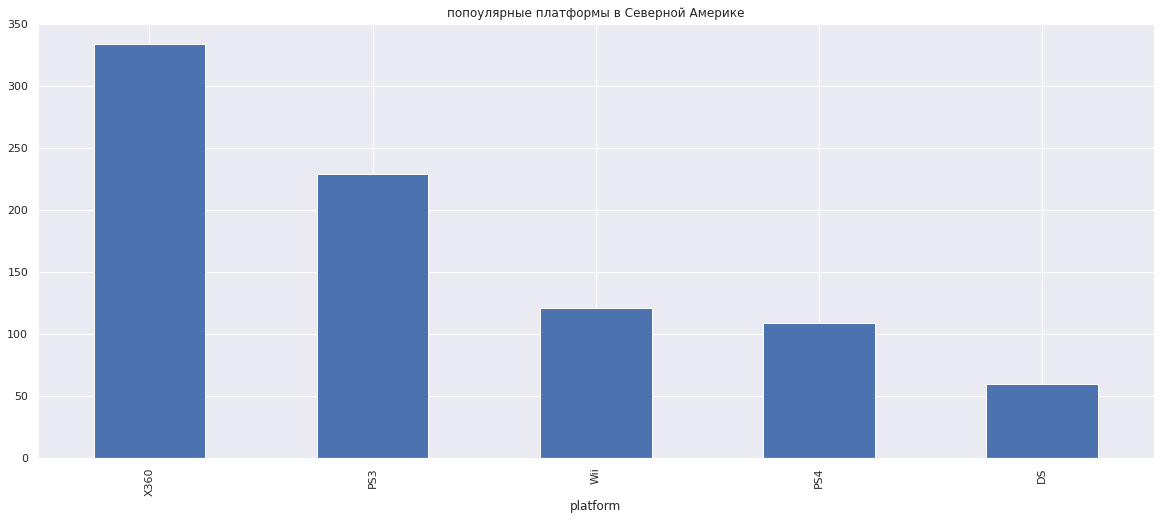

In [84]:
na_top = actual_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
na_top.plot(x = 'platform', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'попоулярные платформы в Северной Америке');

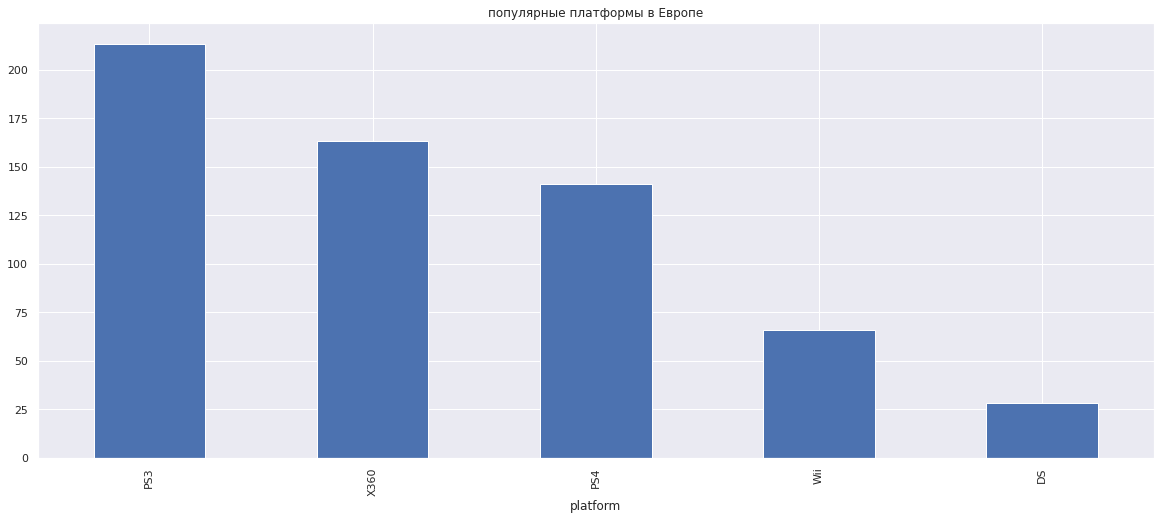

In [85]:
eu_top = actual_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
eu_top.plot(x = 'platform', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'популярные платформы в Европе');

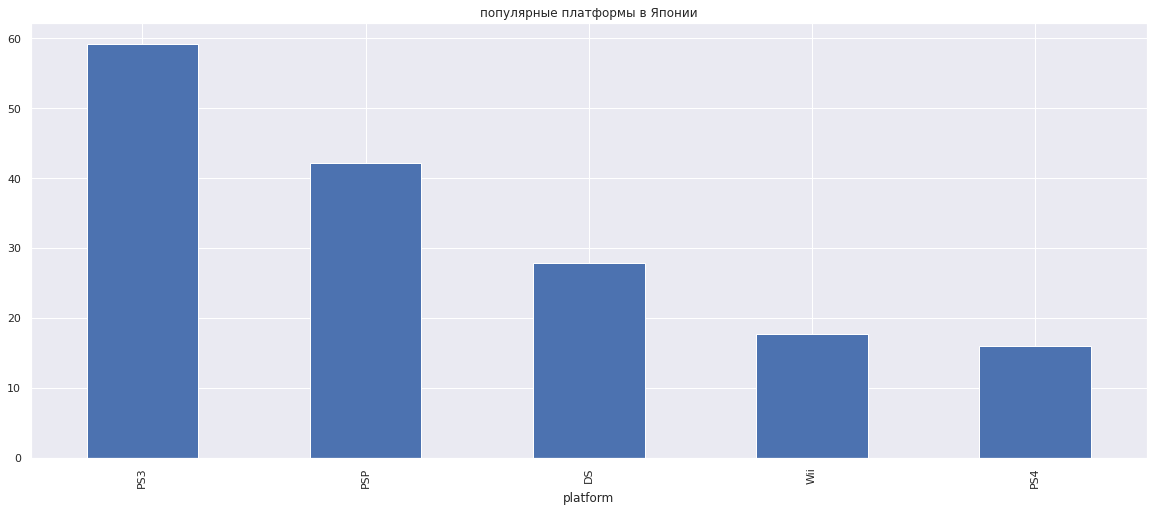

In [86]:
jp_top = actual_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
jp_top.plot(x = 'platform', y = 'jp_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'популярные платформы в Японии');

Пальму первенства в разных регионах получают разные платформы
в северной америке это платформы от microsoft, в японии от sony, а в европе предпочитают обе

## Топ-5 популярные жанры. пояснить разницу ##

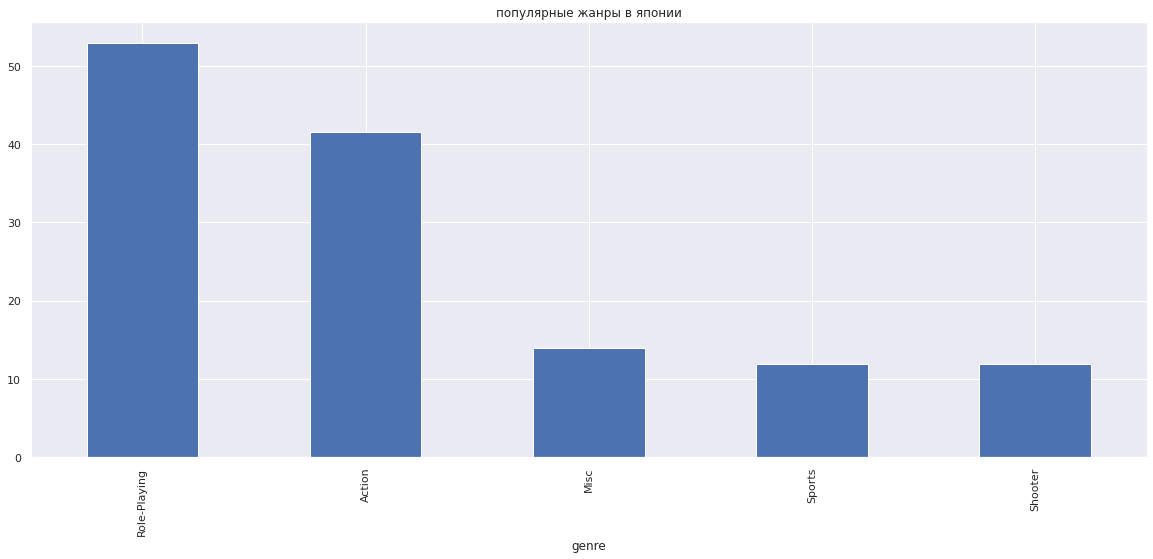

In [87]:
jp_top = actual_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
jp_top.plot(x = 'genre', y = 'jp_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'популярные жанры в японии');

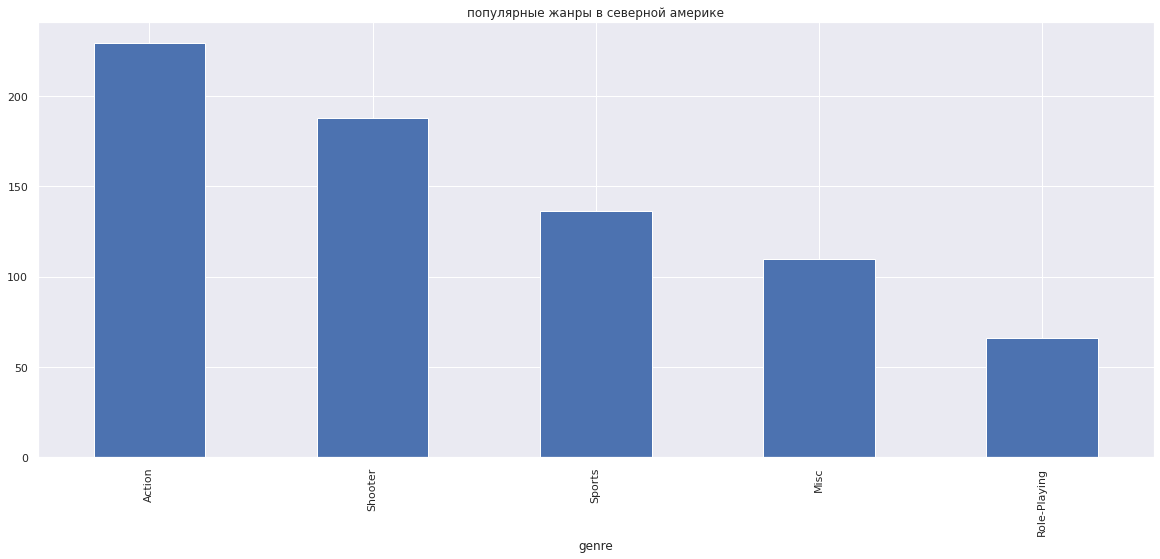

In [88]:
na_top = actual_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
na_top.plot(x = 'genre', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'популярные жанры в северной америке');

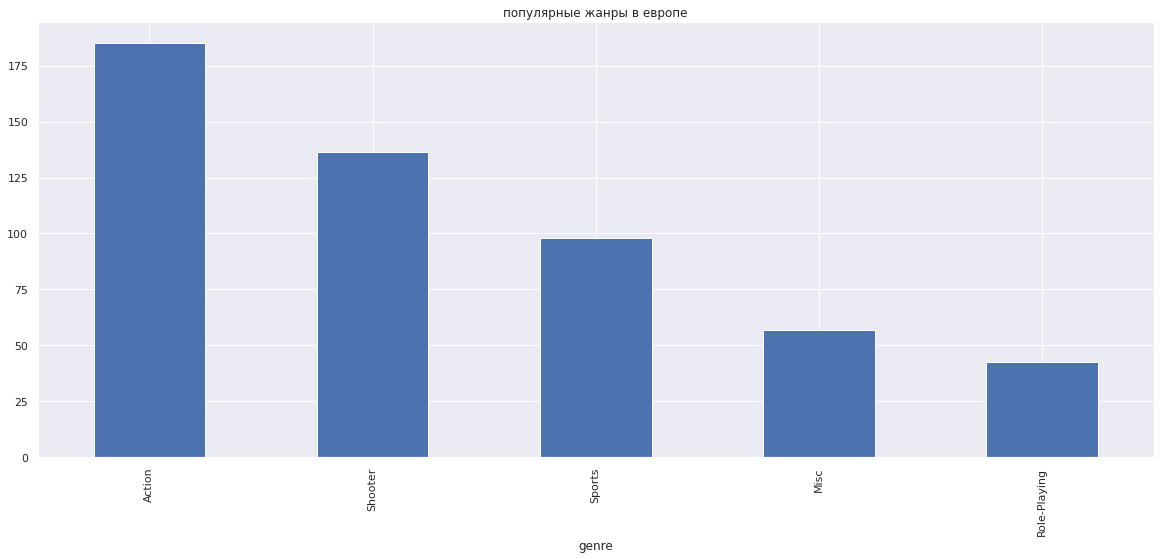

In [89]:
eu_top = actual_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
eu_top.plot(x = 'genre', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'популярные жанры в европе');

По жанрам также есть разница - в Северной Америке и Европе предпочитают экшены и спортивные игры, в то время как с ощутимым отрывом в Японии выбирают ролевые игры
Скорее всего это некоторая особенность ментальности людей и их культуры

## Влияние рейтинга ESRB на продажи в отдельном регионе ##

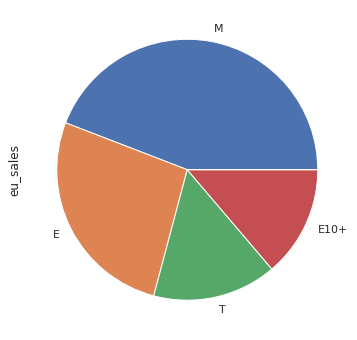

In [90]:
jp_rating = actual_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
na_rating = actual_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
eu_rating = actual_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
eu_rating.plot(kind="pie", y='eu_rating', figsize=(6,6));

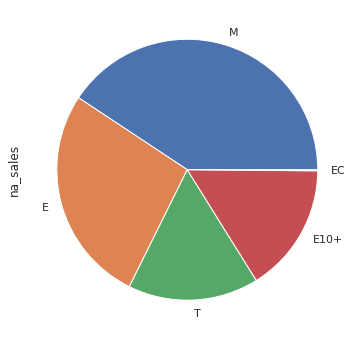

In [91]:
na_rating.plot(kind="pie", y='na_rating', figsize=(6,6));

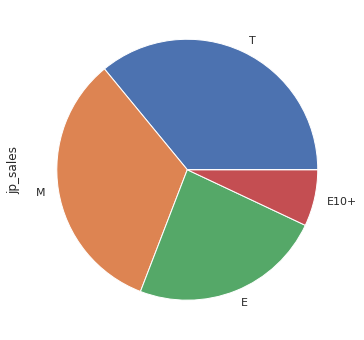

In [92]:
jp_rating.plot(kind="pie", y='jp_rating', figsize=(6,6));

Во всех трех регионах наблюдается одинковая тенденция по выбору в возрастных категориях
Самый частый выбор из категории М = от 17 лет, потом из категорий Е и Т = для всех и для подростков, соответсвенно
Игры узкой специализации или непопулярной возрастной категории будут покупаться реже

# Проверка гипотез #

## Средние пользовательские рейтинги платформ Xbox One и PC одинаковые ##

Нулевая гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC неодинаковые

In [93]:

xb_data=data.query('platform=="XOne"')
pc_data=data.query('platform=="PC"')
result=st.ttest_ind(xb_data['user_score'],pc_data['user_score'],equal_var=False) 
alpha = .05

print('р-значение:', result.pvalue)
if (result.pvalue < alpha):
  print('Отвергаем нулевую гипотезу')
else:
  print('Не отвергаем нулевую гипотезу')


р-значение: 0.0009461326606798378
Отвергаем нулевую гипотезу


На основании имеющихся данных и с уровнем значимости 5% есть основания отвергнуть нулевую гипотезу в пользу альтернативной, которая говорит, что средние пользовательские рейтинги неодинаковые

## Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. ##

Нулевая гипотеза - Средние пользовательские рейтинги жанров Action и Sports разные.

Альтернативная гипотеза - Средние пользовательские рейтинги жанров Action и Sports одинаковые

In [94]:
action = data.query('genre=="Action"')
sport = data.query('genre=="Sports"') 
result = st.ttest_ind(action.user_score, sport.user_score)

print('р-значение:', result.pvalue)
if (result.pvalue < alpha):
  print('Отвергаем нулевую гипотезу')
else:
  print('Не отвергаем нулевую гипотезу')

р-значение: 6.310192688581176e-10
Отвергаем нулевую гипотезу


На основании имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу в пользу альтернативной, которая говорит, что средние пользовательские рейнтинги жанров Action и Sports одинаковые

## Задайте самостоятельно пороговое значение alpha. ##
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

In [95]:
xb_data=data.query('platform=="XOne"')
pc_data=data.query('platform=="PC"')
result=st.ttest_ind(xb_data['user_score'],pc_data['user_score'],equal_var=False) 
alpha = .01

print('р-значение:', result.pvalue)
if (result.pvalue < alpha):
  print('Отвергаем нулевую гипотезу')
else:
  print('Не отвергаем нулевую гипотезу')

р-значение: 0.0009461326606798378
Отвергаем нулевую гипотезу


даже при низком уровне значимости в 1 % есть основания рассмотреть гипотезу, что средние пользовательские рейтинги однинаковые
Нулевая гипотеза может вывести предположение, что успешность платформы/игры зависит или от самой платформы или от жанра. Но судя по одностороннему Т-тесту (а он такой, потому что мы делаем прогноз на следующий год) дело при оценках зрителей не в платформе или жанре, а в других аспектах

# Общий вывод #

<div class="alert alert-success">
<font size="4"><b>ВЫВОД</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
    Произведя анализ общего развития игровой индустрии и актального периода, взятого с 2010 по 2016 год можно сделать следующие выводы:

---необходимо рассматривать актуальную игровую платформу. в среднем активное развитие платформы составляет 5 лет, за это время нужно успеть развивать рекламу и продажи. дальнейшие рекламные компании будут в убыток

----в зависимости от региона нужно продвигать разные жанры игр. В японии это ролевые и экшн игры, в северной америке и европе - экшены и шутеры

----также в зависимотси от региона распространены и соотвутсвующие платформы. Для японии это sony, для европы и северной америки - продукция microsoft

----мобильные игровые устройства, скорее всего, совершенно заменяются мобильными телефонами и имеют минимальный спрос. возможно поэтому нет развития этой ниши



***на слудющий год необходимо рассмотреть первоочердные продажи по жанрам - шутеры,экшены, а ролевые игры для японии и в зависимости от регионального предпочтения производителя платформы*** 
        <br />
    </font>

</div>


